### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

### Import the dataset

In [2]:
df = pd.read_csv("Holiday_Package.csv")

### Exploratory Data Analysis

In [3]:
df.shape

(872, 8)

In [4]:
df.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


Two Categorical Variables and 6 continuous variables present

In [6]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


"Unnamed: 0" is of no significance as it is a serial number. We will drop this column

In [7]:
df.drop("Unnamed: 0", axis=1, inplace = True)

In [8]:
#confirming the column has been removed
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [9]:
# Check for Null Values

df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

No Null values present

In [10]:
# getting the statisticscontinuous variables
df.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


From the above statistics, we can say that there is skewness in some variables and outliers are present. Let's plot the histogram to get more insights

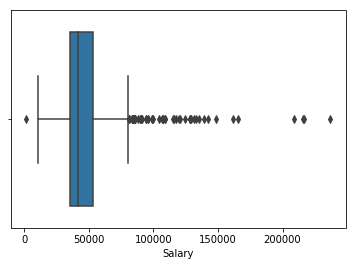

In [11]:
sns.boxplot(df.Salary)

Slary is right skewed and Outliers are present that need to be treated

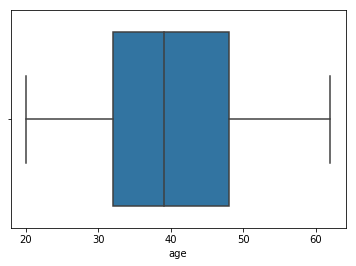

In [12]:
sns.boxplot(df.age)

No outliers present and data is approximately normal

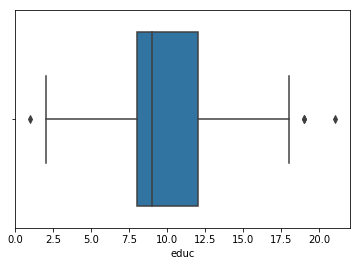

In [13]:
sns.boxplot(df.educ)

Very few outliers present which can be ignored and data is right skewed

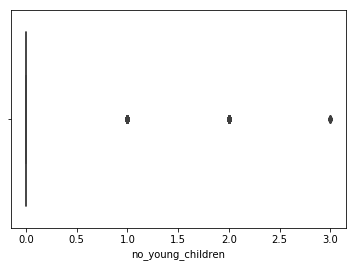

In [14]:
sns.boxplot(df.no_young_children)

This looks weird, let's check more on this attribute

In [15]:
df.no_young_children.nunique()

4

In [16]:
df.no_young_children.unique()

array([1, 0, 2, 3], dtype=int64)

"no_young_children" is categorical in Nature and should be converted.

In [17]:
df.no_older_children.unique()

array([1, 0, 2, 4, 3, 5, 6], dtype=int64)

Same is for "no_older_children"

In [18]:
# Converting no_older_children and no_young_children to categorical
df['no_young_children'] = pd.Categorical(df.no_young_children)
df['no_older_children'] = pd.Categorical(df.no_older_children)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Holliday_Package   872 non-null    object  
 1   Salary             872 non-null    int64   
 2   age                872 non-null    int64   
 3   educ               872 non-null    int64   
 4   no_young_children  872 non-null    category
 5   no_older_children  872 non-null    category
 6   foreign            872 non-null    object  
dtypes: category(2), int64(3), object(2)
memory usage: 36.4+ KB


In [20]:
for feature in df.columns: 
    if df[feature].dtype == 'object' : 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [21]:
# Checking the proportion of Target Variable
df.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

C:\Users\Monika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


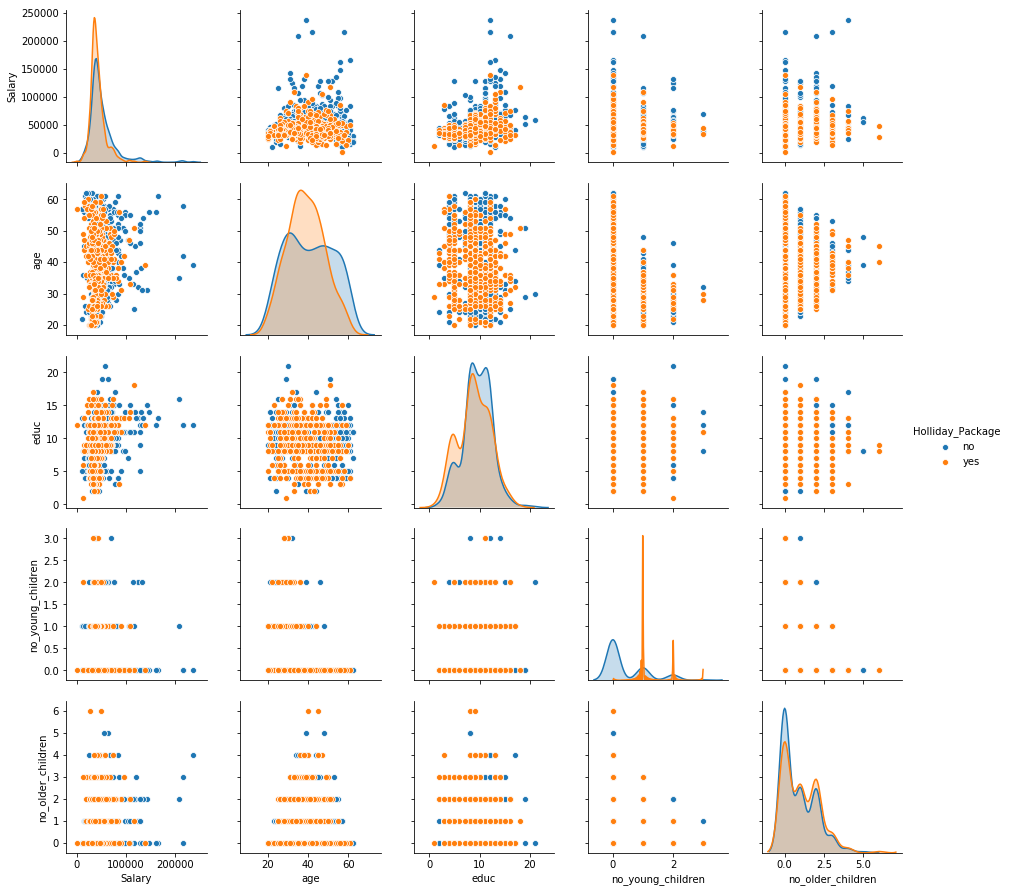

In [22]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Holliday_Package')

From the pairplot we can see that "age" and "no_young_children" are good predictors for Holliday_Package but the rest show similar behaviour. Let us treat outliers and compare the info again. 

### Treating the Outliers

In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR) 
upper_range= Q3+(1.5 * IQR)
print('Lower Range:\n', lower_range, 'Upper Range:\n',upper_range)

Lower Range:
 Salary    8105.75
age          8.00
educ         2.00
dtype: float64 Upper Range:
 Salary    80687.75
age          72.00
educ         18.00
dtype: float64


In [24]:
df['Salary']=np.where(df['Salary']> 80687.75,80687.75,df['Salary'])
df['Salary']=np.where(df['Salary']< 8105.75,8105.75,df['Salary'])

In [25]:
df['educ']=np.where(df['educ']> 18,18,df['educ'])
df['educ']=np.where(df['educ']< 2,2,df['educ'])

C:\Users\Monika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


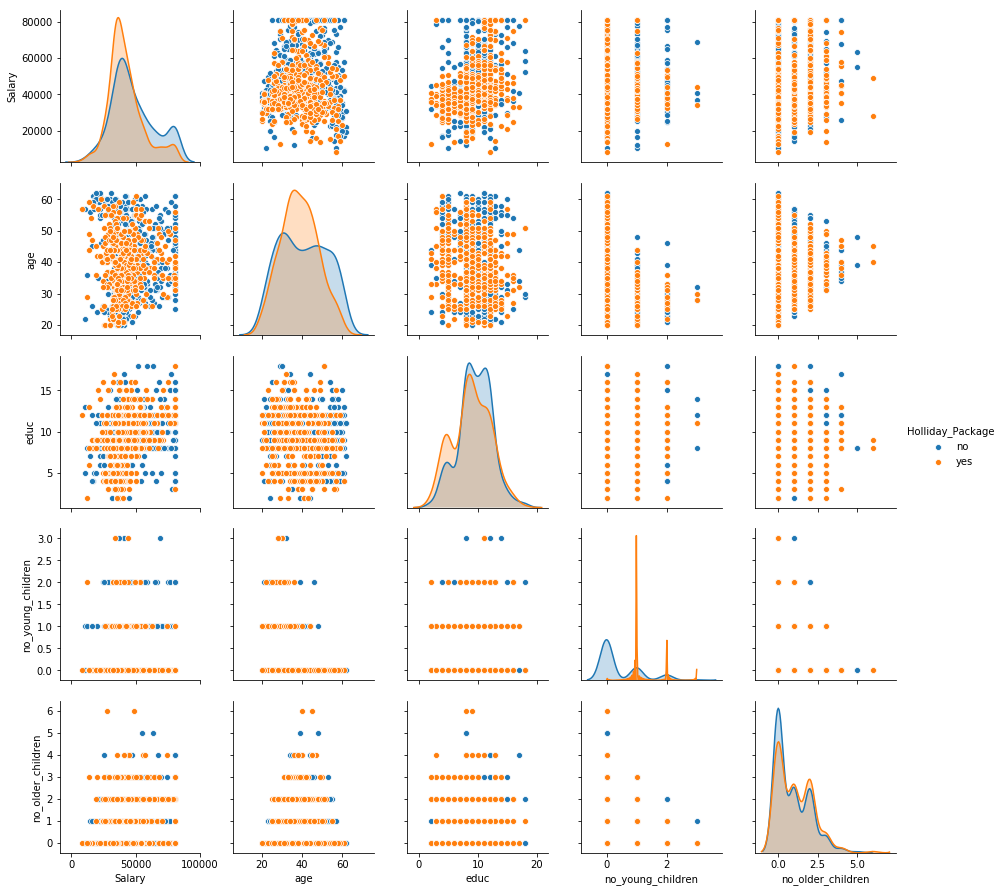

In [26]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Holliday_Package')

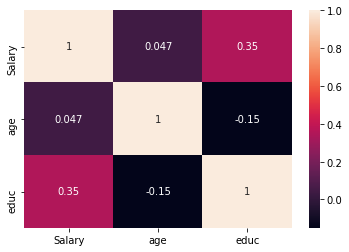

In [27]:
sns.heatmap(df.corr(), annot = True)

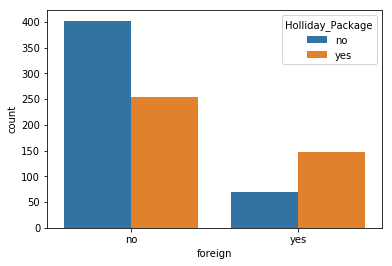

In [28]:
sns.countplot(data = df, x ='foreign', hue = 'Holliday_Package' )

Foreign is a good predictor for Holliday_Package

### Converting all objects to Categorical Codes

In [29]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


### Train Test Split

In [30]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df[['Holliday_Package']]

In [31]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Logistic Regression Model

In [32]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Monika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Monika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting on Training and Test Dataset

In [33]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Class and Probs

In [34]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.608018,0.391982
1,0.530967,0.469033
2,0.553861,0.446139
3,0.616483,0.383517
4,0.517722,0.482278


### Model Evaluation

#### Training Data

In [35]:
# Accuracy - Training Data
model.score(X_train,y_train)

0.5245901639344263

This is not a good model as the accuracy is lower than initial probability

AUC: 0.574


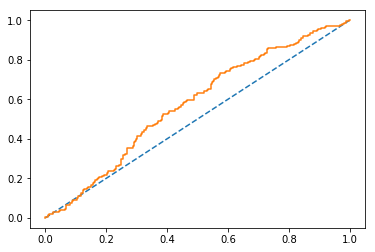

In [36]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [37]:
confusion_matrix(y_train, ytrain_predict)

array([[311,  15],
       [275,   9]], dtype=int64)

In [38]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.53      0.95      0.68       326
           1       0.38      0.03      0.06       284

    accuracy                           0.52       610
   macro avg       0.45      0.49      0.37       610
weighted avg       0.46      0.52      0.39       610



#### Test data

In [39]:
# Accuracy - Test Data

model.score(X_test,y_test)

0.5381679389312977

AUC: 0.627


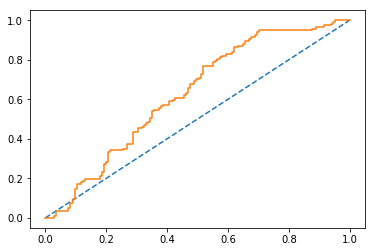

In [40]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [41]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[141,   4],
       [117,   0]], dtype=int64)

In [42]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.55      0.97      0.70       145
           1       0.00      0.00      0.00       117

    accuracy                           0.54       262
   macro avg       0.27      0.49      0.35       262
weighted avg       0.30      0.54      0.39       262



### Since accuracy is less, will test the model without educ and no_older_children as these are not good predictors (as observed from pair plot)

In [43]:
df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [44]:
# Copy all the predictor variables into X dataframe
#X1 = df[['foreign','age','no_young_children','no_older_children']]

X1 = df[['foreign','age','no_young_children','no_older_children']]

# Copy target into the y dataframe. 
y1 = df[['Holliday_Package']]

In [45]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30 , random_state=1)
model1 = LogisticRegression()
model1.fit(X_train,y_train)
ytrain_predict = model1.predict(X_train)
ytest_predict = model1.predict(X_test)

C:\Users\Monika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Monika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
print('Accuracy Train Data  ',model1.score(X_train,y_train))
print('Accuracy Test Data  ',model1.score(X_test,y_test))

Accuracy Train Data   0.6655737704918033
Accuracy Test Data   0.6564885496183206


If we include "educ" the difference between accuracy of train and test data increases which can be considered as an example of overfitting <br>
Also, "Salary" reduces the performance of the model significantly. 

### Performance Evaluation

In [47]:
ytrain_predict = model1.predict(X_train)
ytest_predict = model1.predict(X_test)

### Train Data

AUC: 0.731


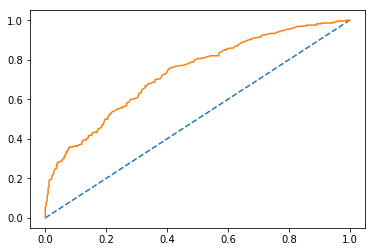

In [48]:
# predict probabilities
probs = model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the mode
plt.plot(lr_train_fpr, lr_train_tpr)

In [49]:
confusion_matrix(y_train, ytrain_predict)

array([[256,  70],
       [134, 150]], dtype=int64)

In [50]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       326
           1       0.68      0.53      0.60       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



### Test Data

In [51]:
ytest_predict_prob=model1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.697099,0.302901
1,0.274864,0.725136
2,0.871891,0.128109
3,0.914199,0.085801
4,0.598931,0.401069


AUC: 0.627


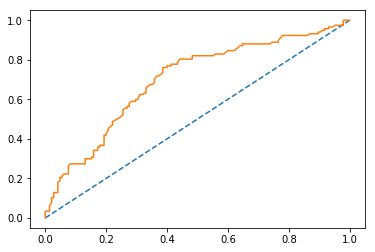

In [52]:
# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the mode
plt.plot(lr_test_fpr, lr_test_tpr)

In [53]:
confusion_matrix(y_test,ytest_predict)

array([[107,  38],
       [ 52,  65]], dtype=int64)

In [54]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       145
           1       0.63      0.56      0.59       117

    accuracy                           0.66       262
   macro avg       0.65      0.65      0.65       262
weighted avg       0.65      0.66      0.65       262



## LDA

In [55]:
#X_scaledtrain=scale(X_train)

In [56]:
clf=LinearDiscriminantAnalysis()
model2=clf.fit(X_train,y_train)
model2

C:\Users\Monika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [57]:
# Predict it
pred_class2_train= model2.predict(X_train)
pred_class2_test = model2.predict(X_test)

In [58]:
#Accuracy Train data
model2.score(X_train,y_train)

0.6672131147540984

In [59]:
#Acuracy of Test data
model2.score(X_test,y_test)

0.6603053435114504

In [60]:
#Classification Report Test Data
print(classification_report(y_test, pred_class2_test))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       145
           1       0.63      0.56      0.60       117

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.66       262



In [61]:
confusion_matrix(y_test,pred_class2_test)

array([[107,  38],
       [ 51,  66]], dtype=int64)

AUC: 0.694


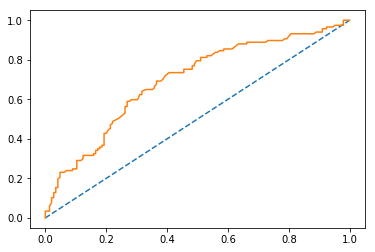

In [62]:
# Test Data
# predict probabilities
probs = model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

In [63]:
model2.coef_

array([[ 1.49900902, -0.06010978, -1.4236708 , -0.10058684]])

AUC: 0.730


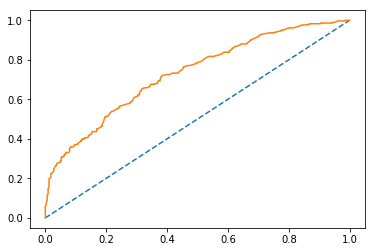

In [64]:
# Train Data
# predict probabilities
probs = model2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

In [65]:
confusion_matrix(y_train, pred_class2_train)

array([[254,  72],
       [131, 153]], dtype=int64)

In [66]:
print(classification_report(y_train, pred_class2_train))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71       326
           1       0.68      0.54      0.60       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



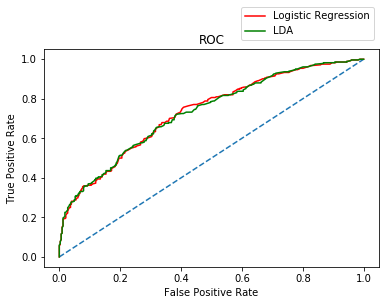

In [67]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="Logistic Regression")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

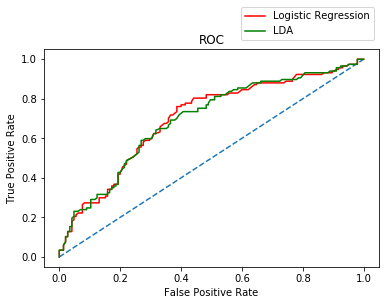

In [68]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="Logistic Regression")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### LDA Coefficients

In [69]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model2.coef_[0][idx]))

The coefficient for foreign is 1.4990090229419906
The coefficient for age is -0.060109782710257645
The coefficient for no_young_children is -1.4236708031942729
The coefficient for no_older_children is -0.10058684102520804


In [70]:
intercept = model2.intercept_[0]

print("The intercept for LDA model is {}".format(intercept))

The intercept for LDA model is 2.4164176910694257


### Logistic Regression Coefficients

In [71]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model1.coef_[0][idx]))

The coefficient for foreign is 1.4101597858838493
The coefficient for age is -0.04851604659830628
The coefficient for no_young_children is -1.3268405454803827
The coefficient for no_older_children is -0.06010949287673012


In [72]:
intercept = model1.intercept_[0]

print("The intercept for Logistic Regression model is {}".format(intercept))

The intercept for Logistic Regression model is 1.9002861693942994
